# Pizza Resturant Analytics

We're going to answer the following questions:
1. In which cities or states are pizza restaurants most common?
2. How do pizza prices vary across geographies?
3. What words are most often used to describe pizzas?

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# read pizza data
pizza = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/8358_1.csv")
pizza.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [16]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3510 non-null   object 
 1   address             3510 non-null   object 
 2   categories          3510 non-null   object 
 3   city                3510 non-null   object 
 4   country             3510 non-null   object 
 5   keys                3510 non-null   object 
 6   latitude            3510 non-null   float64
 7   longitude           3510 non-null   float64
 8   menuPageURL         610 non-null    object 
 9   menus.amountMax     2948 non-null   float64
 10  menus.amountMin     2948 non-null   float64
 11  menus.currency      2951 non-null   object 
 12  menus.dateSeen      3510 non-null   object 
 13  menus.description   1526 non-null   object 
 14  menus.name          3510 non-null   object 
 15  name                3510 non-null   object 
 16  postal

In [17]:
# extract interested columns
pizza_sub = pizza.copy()[['id', 'city', 'address', 'postalCode', 
                          'menus.name', 'latitude', 'longitude',
                          'menus.amountMax', 'menus.amountMin']]
pizza_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3510 non-null   object 
 1   city             3510 non-null   object 
 2   address          3510 non-null   object 
 3   postalCode       3484 non-null   object 
 4   menus.name       3510 non-null   object 
 5   latitude         3510 non-null   float64
 6   longitude        3510 non-null   float64
 7   menus.amountMax  2948 non-null   float64
 8   menus.amountMin  2948 non-null   float64
dtypes: float64(4), object(5)
memory usage: 246.9+ KB


# Most Popular Pizza Name

In [18]:
# drop duplicates
pizza_sub = pizza_sub.drop_duplicates(subset=['id', 'menus.name'])

# count the pizza names
names_of_pizza = pizza_sub['menus.name'].value_counts()

# merge `names_of_pizza` to `pizza_sub`
pizza_sub = pd.merge(pizza_sub, names_of_pizza.to_frame(),
                     left_on='menus.name', right_index=True, how='left')

pizza_sub.head()

,id,city,address,postalCode,menus.name_x,latitude,longitude,menus.amountMax,menus.amountMin,menus.name_y
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1


In [58]:
#names_of_pizza = names_of_pizza.to_frame("Count")
#names_of_pizza = names_of_pizza.reset_index()
names_of_pizza = names_of_pizza.rename(columns={'index': 'Pizza Name', 'Count': 'count'})
names_of_pizza

,Pizza Name,count
0,Cheese Pizza,130
1,White Pizza,74
2,Pizza,62
3,Margherita Pizza,60
4,Hawaiian Pizza,53
...,...,...
1593,Pizza Turnover,1
1594,Margarita Sicilian Pizza,1
1595,Eggplant Parmigiana Sicilian Pizza,1
1596,Chicken Parmigiana Sicilian Pizza,1


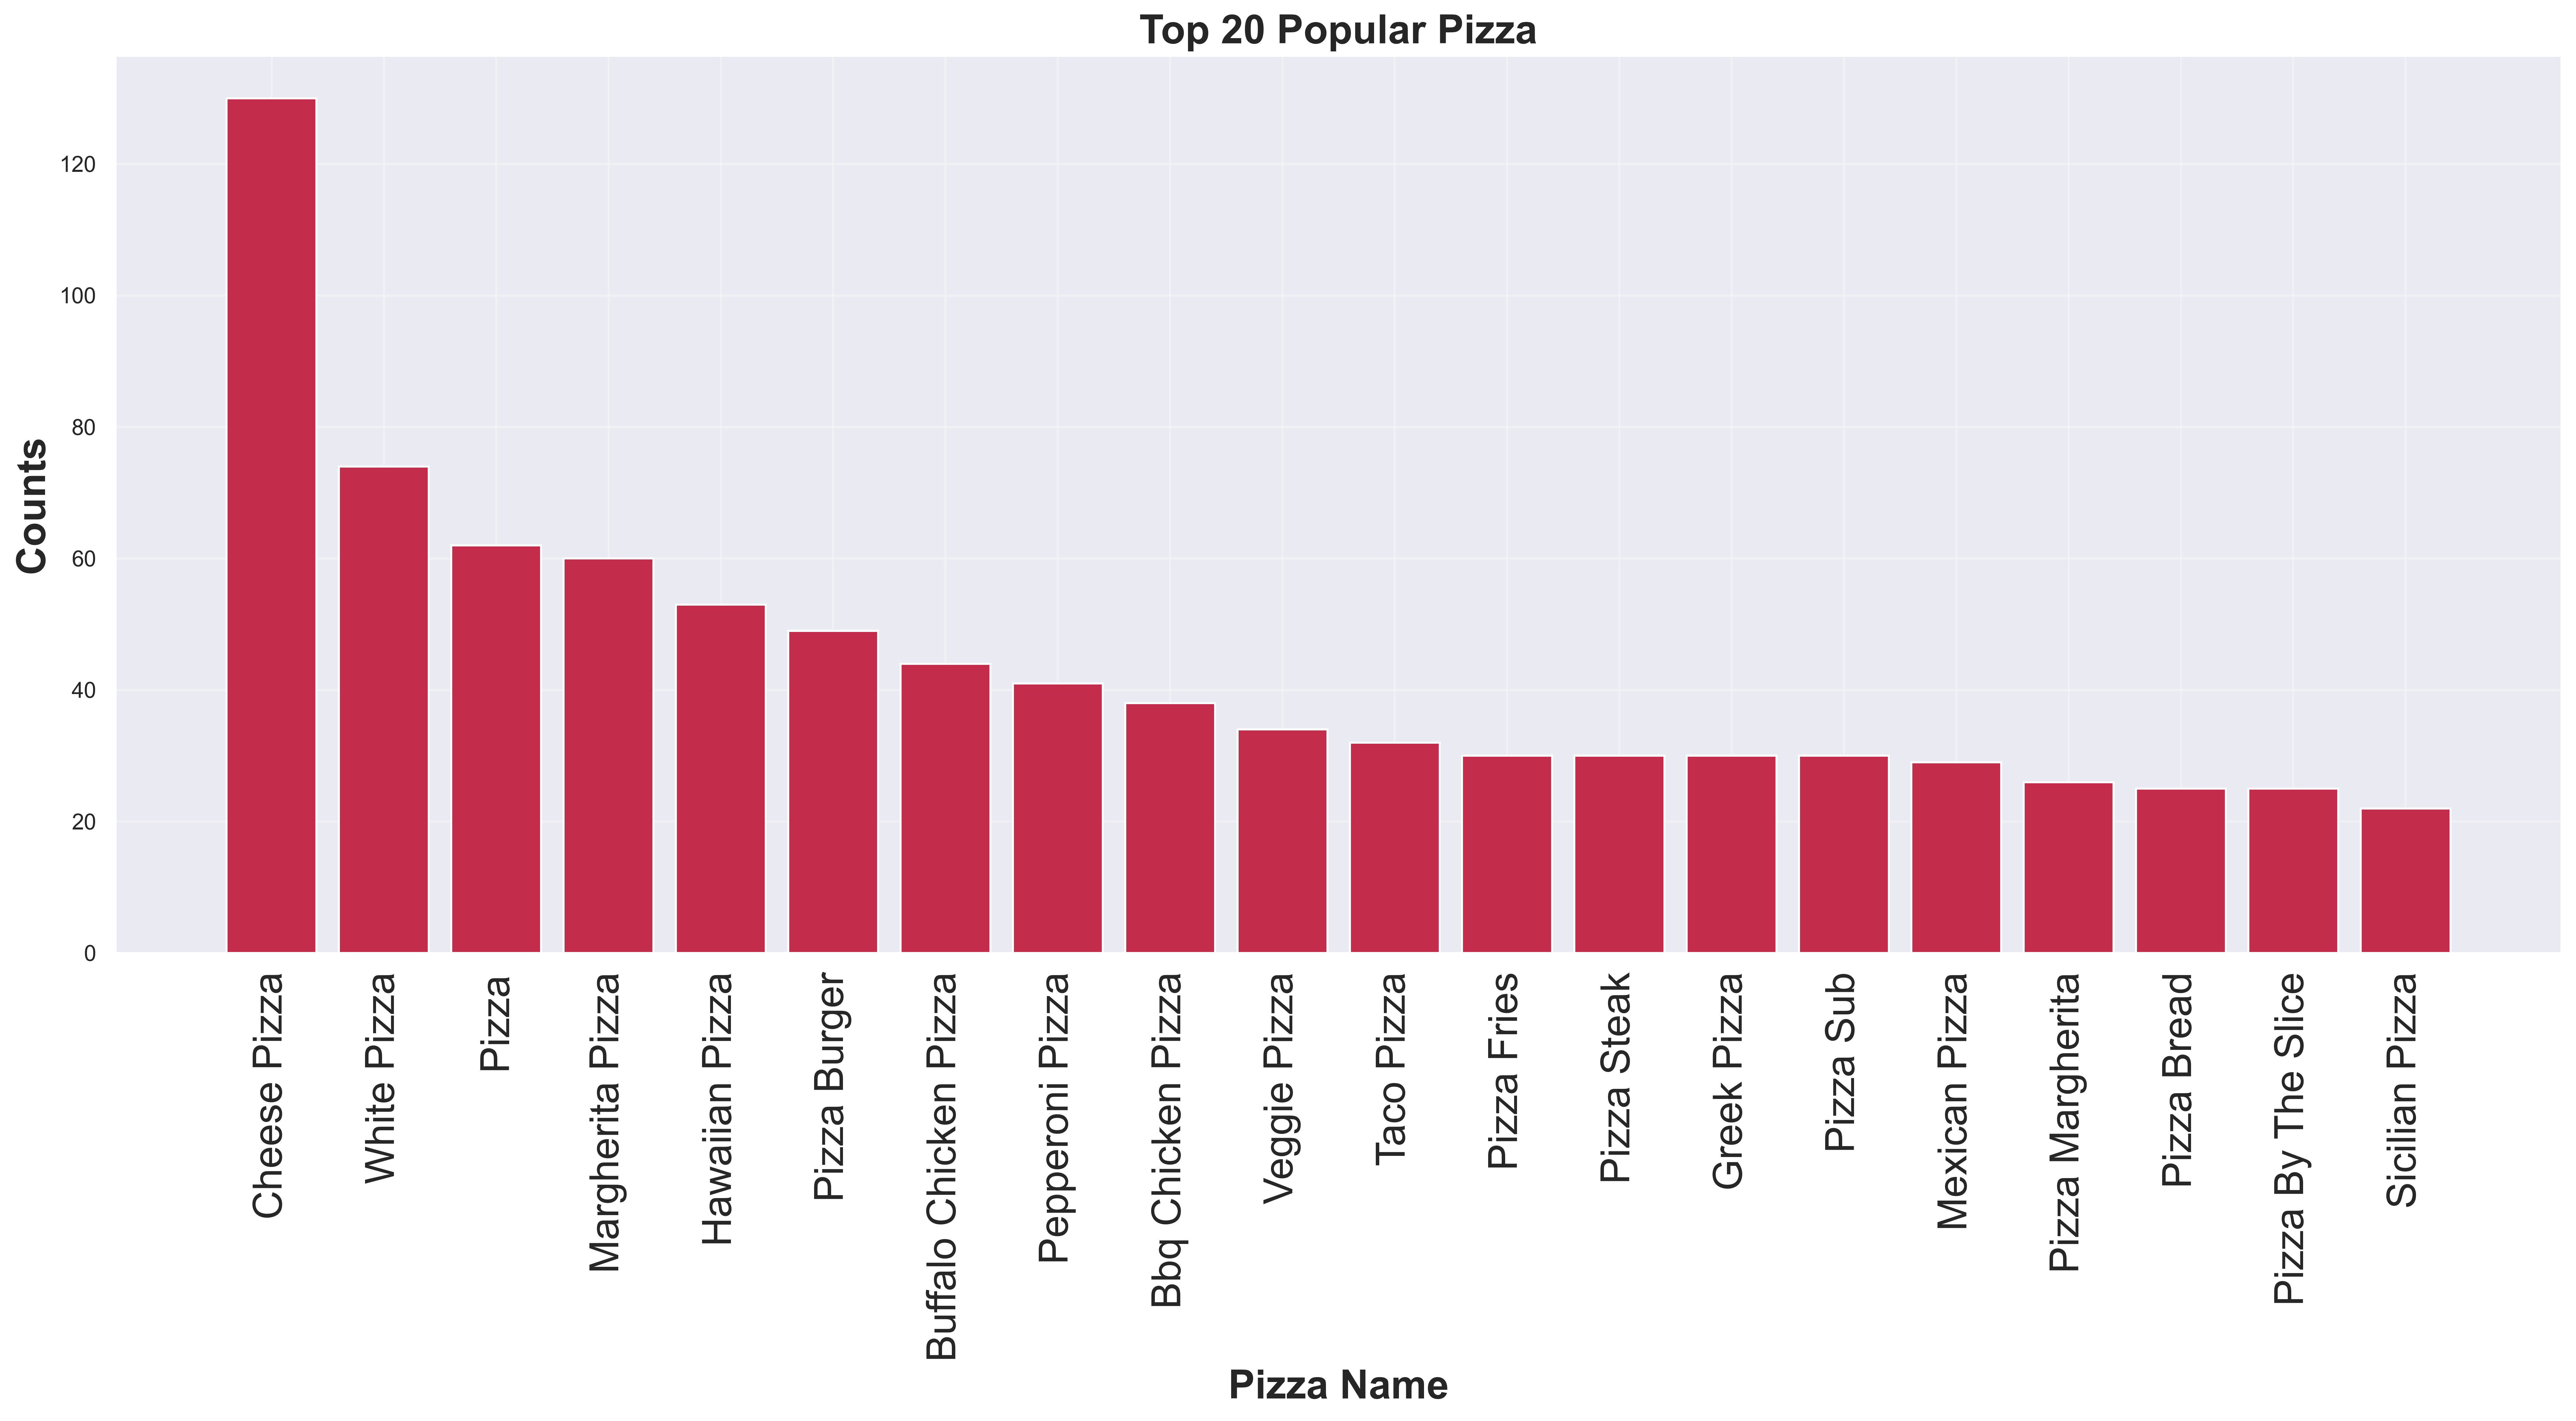

In [84]:
sns.set()
plt.figure(figsize=(18,10), dpi=500)
sns.barplot(x=names_of_pizza["Pizza Name"][:20], y=names_of_pizza["count"][:20], color="crimson")
plt.title('Top 20 Popular Pizza', fontsize=20, fontweight="bold")
plt.xticks(rotation=90, fontsize=20)
plt.xlabel('Pizza Name', fontsize=20, fontweight="bold")
plt.ylabel('Counts', fontsize=20, fontweight="bold")
plt.grid(alpha=.3)
plt.margins(.05)
plt.tight_layout()
plt.show()

# Get the State information for each pizza restaurant

In [85]:
# Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/14zpallagi.csv.zip'
zipresp = urlopen(zipurl)
tempzip = open("tempfile.zip", "wb")
tempzip.write(zipresp.read())
tempzip.close()
zf = ZipFile("tempfile.zip") 
zf.extractall(path = '')
zf.close()

In [86]:
# read zipcode data
zipcode = pd.read_csv('14zpallagi.csv', usecols=['STATE', 'zipcode'], dtype={'zipcode': 'str'})
zipcode.head()

,STATE,zipcode
0,AL,00000
1,AL,00000
2,AL,00000
3,AL,00000
4,AL,00000


In [87]:
# drop duplicates
zipcode = zipcode.drop_duplicates(['zipcode'])
zipcode.head()

,STATE,zipcode
0,AL,00000
6,AL,35004
12,AL,35005
18,AL,35006
24,AL,35007


In [93]:
# merge `pizza data` and `zipcode data`
pizza_merge = pd.merge(pizza_sub, zipcode, left_on='postalCode', right_on='zipcode', how='left')
pizza_merge.head()

,id,city,address,postalCode,menus.name_x,latitude,longitude,menus.amountMax,menus.amountMin,menus.name_y,STATE,zipcode
0,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,97701
1,AVwc_6KEIN2L1WUfrKAH,Bend,Cascade Village Mall Across From Target,97701,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,97701
2,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,90049
3,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,90049
4,AVwc_6qRByjofQCxkcxw,Los Angeles,148 S Barrington Ave,90049,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,90049


#Count the number of pizza restaurants by State

In [94]:
# count the restaurants by State
counts = pizza_merge["STATE"].value_counts()

# merge
pizza_clean = pd.merge(pizza_merge, counts.to_frame(), 
                       left_on='STATE', right_index=True, how='left')

# drop unused columns and missing values
pizza_clean = pizza_clean.drop(['id', 'postalCode', 'zipcode'], axis=1).dropna()

# rename columns
pizza_clean.columns = ['city', 'address', 'pizza_name',
                        'latitude', 'longitude', 
                        'menus_amountMax', 'menus_amountMin',
                        'pizza_counts', 'state', 'state_counts']

pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,pizza_counts,state,state_counts
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,24.0
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,24.0
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,326.0
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,326.0
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,326.0


## Average Pizza Price per State

In [96]:
pizza_clean["average_price"] = (pizza_clean["menus_amountMax"] + pizza_clean["menus_amountMin"]) / 2
pizza_clean.head()

,city,address,pizza_name,latitude,longitude,menus_amountMax,menus_amountMin,pizza_counts,state,state_counts,average_price
0,Bend,Cascade Village Mall Across From Target,Bianca Pizza,44.102665,-121.300797,22.50,15.50,3,OR,24.0,19.00
1,Bend,Cascade Village Mall Across From Target,Cheese Pizza,44.102665,-121.300797,18.95,18.95,130,OR,24.0,18.95
2,Los Angeles,148 S Barrington Ave,"Pizza, Margherita",34.064563,-118.469017,12.00,12.00,1,CA,326.0,12.00
3,Los Angeles,148 S Barrington Ave,"Pizza, Mushroom",34.064563,-118.469017,13.00,13.00,1,CA,326.0,13.00
4,Los Angeles,148 S Barrington Ave,"Pizza, Puttenesca",34.064563,-118.469017,13.00,13.00,1,CA,326.0,13.00


,state,average_price
21,MS,15.785455
36,UT,15.673333
7,FL,15.212295
23,NC,14.725137
20,MO,14.673462
3,CA,14.483645
26,NV,14.337500
27,NY,14.227587
37,VA,14.159062
15,KY,13.255000


In [99]:
# Let's groupby city now and check the result
pizza_clean.groupby("city")["average_price"].mean().reset_index().sort_values(by="average_price", ascending=False).head(10)

,city,average_price
259,Marina Del Rey,97.450000
192,Hollywood,69.950000
459,Wellington,65.640000
183,Henrico,48.023333
387,Saint Louis,31.054000
401,Sayville,27.500000
188,Highwood,25.740000
373,Rockingham,24.233333
180,Hattiesburg,24.233333
218,Kinston,24.233333


## Map Visualisations

In [127]:
import plotly.graph_objects as go

# Create a scattergeo trace
trace = go.Scattergeo(
    lat=pizza['latitude'],  # Latitude values
    lon=pizza['longitude'],  # Longitude values
    mode='markers',
    marker=dict(
        size=10,
        color='blue',
        opacity=0.8,
        symbol='circle'
    ),
    text=pizza["name"]  # Text labels for each marker
)

# Create the layout
layout = go.Layout(
    title='Pizza Restaurants in USA',
    geo=dict(
        scope='usa',
        showland=True,
        landcolor='rgb(217, 217, 217)',
        subunitcolor='rgb(255, 255, 255)',
        countrycolor='rgb(255, 255, 255)',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showsubunits=True,
        showcountries=True,
        resolution=50,
        projection=dict(
            type='albers usa'
        ),
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()

### Pizza Restaurant Density per State

In [132]:
fig = go.Figure(go.Choropleth(
    locations=pizza_clean["state"],
    z=pizza_clean["state_counts"].astype(float),
    locationmode="USA-states",
    colorscale="burgyl",
    autocolorscale=False,
    text=pizza_clean["state"],
    marker_line_color="white",
    colorbar_title="Number of Pizza Restaurants"
))

fig.update_layout(
    title_text="Pizza Restaurants in Each US State",
    geo = dict(
        scope="usa",
        projection=go.layout.geo.Projection(type="albers usa"),
        showlakes=True,
        lakecolor="rgb(255,255,255)"),
    
    margin=dict(l=0, r=0, t=50, b=0)

    
)

fig.show()